## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [24]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來

df_train = pd.read_csv("C:/Users/Administrator/Desktop/Python資料科學程式馬拉松/5.專案/Titanic_train.csv")
df_test = pd.read_csv("C:/Users/Administrator/Desktop/Python資料科學程式馬拉松/5.專案/Titanic_test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [6]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [7]:
#可以嘗試用範例的程式

df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

ANS : 在Age . Fare . Cabin裡有遺失值

In [9]:
# 有空值的變數個數
print(df_train.isnull().any().sum())

3


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [54]:
#合併資料
df = pd.concat([df_train, df_test], axis = 0, join = 'outer', ignore_index = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [55]:
# 以 XXX 為例，先看 Cabin  出現值的特性
print(df['Cabin'].value_counts())

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64


cabin 不能隨意補值，須先進一步觀察和處理

方法1:遺失的屬於另一類。

方法2:看 cabin 和其他變數有無關係，可以進行補值。

方法3:遺失比例太高，可以先不放入模型。

In [56]:
# 方法1:遺失的屬於另一類
df["Cabin"] = df["Cabin"].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
df["Cabin"].unique()
df["Cabin"].head()

0    NoCabin
1          C
2    NoCabin
3          C
4    NoCabin
Name: Cabin, dtype: object

C:\Users\Administrator\anaconda\envs\vnpy_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cabin', ylabel='count'>

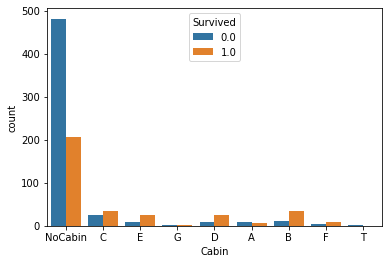

In [57]:
sns.countplot(df['Cabin'], hue=df['Survived'])

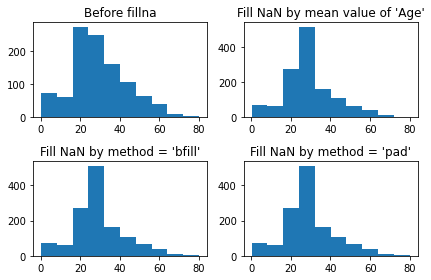

In [58]:
# 方法2:看 cabin 和其他變數有無關係，可以進行補值

fig, axes = plt.subplots(2, 2)

# 補值前
axes[0,0].hist(df['Age'])
axes[0,0].set_title('Before fillna')

# 以平均值補值
df['Age'] = df['Age'].fillna(df['Age'].mean())
axes[0, 1].hist(df['Age'])
axes[0, 1].set_title("Fill NaN by mean value of 'Age'")

# 以前值補後nan
df['Age'] = df['Age'].fillna(method = 'bfill')
axes[1, 0].hist(df['Age'])
axes[1, 0].set_title("Fill NaN by method = 'bfill'")

# 以後值補前nan
df['Age'] = df['Age'].fillna(method = 'pad')
axes[1, 1].hist(df['Age'])
axes[1, 1].set_title("Fill NaN by method = 'pad'")

fig.tight_layout()

使用平均值來填值的話會使平均值的Age數量較多，與填值前的分布較為不同。
如當使用bfill或是pad時，其分布結果會與填值前的情形較為相似，故此資料的'Age'可能較適合用這兩種方法做填值。